In [1]:
import pandas as pd
from pathlib import Path
import lightgbm as lgb

In [2]:
DATA_PATH = Path("../data")
COMP_DATA_PATH = Path("../data")
IMAGE_PATH = Path("../dataset")

TEST_SET = COMP_DATA_PATH / "test_df_with_features_v1.csv"
TRAIN_SPLIT = DATA_PATH / "train_df_with_features_v1.csv"
VAL_SPLIT = DATA_PATH / "val_df_with_features_v1.csv"

In [3]:
train_features = pd.read_csv(TRAIN_SPLIT)
test_features = pd.read_csv(TEST_SET)
val_features = pd.read_csv(TRAIN_SPLIT)
train_features

,image_url1,image_url2,is_same,image_path1,image_path2,ahash_16,phash_16_8,phash,dhash_verical_16,dhash_16,colorhash_21,colorhash_33,colorhash_63,colorhash_123,whash_16_haar,whash_16_db4,left_height,right_height,left_width,right_width
0,892325437.jpg,944751814.jpg,0,dataset/images-b1/892325437.jpg,dataset/images-b1/944751814.jpg,119.0,108.0,108.0,136.0,137.0,80.0,172.0,375.0,618.0,122.0,310.0,600.0,600.0,800.0,800.0
1,965225293.jpg,965564035.jpg,1,dataset/images-b3/965225293.jpg,dataset/images-b1/965564035.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,800.0,800.0,600.0,600.0
2,892403612.jpg,927225968.jpg,0,dataset/images-b3/892403612.jpg,dataset/images-b1/927225968.jpg,115.0,126.0,126.0,120.0,96.0,59.0,97.0,184.0,277.0,114.0,222.0,600.0,600.0,800.0,800.0
3,917878082.jpg,921610429.jpg,1,dataset/images-b3/917878082.jpg,dataset/images-b2/921610429.jpg,10.0,24.0,24.0,19.0,25.0,15.0,31.0,65.0,94.0,8.0,28.0,600.0,600.0,800.0,800.0
4,907769150.jpg,921819974.jpg,0,dataset/images-b3/907769150.jpg,dataset/images-b1/921819974.jpg,73.0,100.0,100.0,107.0,114.0,51.0,93.0,185.0,284.0,76.0,116.0,800.0,600.0,600.0,800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72482,896077337.jpg,932363571.jpg,0,dataset/images-b2/896077337.jpg,dataset/images-b3/932363571.jpg,140.0,104.0,104.0,118.0,104.0,55.0,122.0,261.0,411.0,120.0,250.0,600.0,600.0,800.0,800.0
72483,919255125.jpg,922397616.jpg,0,dataset/images-b3/919255125.jpg,dataset/images-b1/922397616.jpg,96.0,108.0,108.0,117.0,103.0,73.0,116.0,238.0,360.0,106.0,222.0,600.0,563.0,800.0,1000.0
72484,924310310.jpg,925806417.jpg,1,dataset/images-b3/924310310.jpg,dataset/images-b1/925806417.jpg,4.0,0.0,0.0,3.0,0.0,19.0,19.0,17.0,14.0,0.0,2.0,600.0,600.0,800.0,800.0
72485,927655303.jpg,931435054.jpg,1,dataset/images-b1/927655303.jpg,dataset/images-b2/931435054.jpg,2.0,8.0,8.0,4.0,6.0,30.0,60.0,153.0,247.0,0.0,98.0,800.0,800.0,600.0,600.0


In [4]:
train_features_cleaned = train_features.drop(["image_url1", "image_url2", "image_path1", "image_path2"], axis=1)
test_features_cleaned = test_features.drop(["image_url1", "image_url2", "image_path1", "image_path2"], axis=1)
val_features_cleaned = val_features.drop(["image_url1", "image_url2", "image_path1", "image_path2"], axis=1)
train_features_cleaned

,is_same,ahash_16,phash_16_8,phash,dhash_verical_16,dhash_16,colorhash_21,colorhash_33,colorhash_63,colorhash_123,whash_16_haar,whash_16_db4,left_height,right_height,left_width,right_width
0,0,119.0,108.0,108.0,136.0,137.0,80.0,172.0,375.0,618.0,122.0,310.0,600.0,600.0,800.0,800.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,800.0,800.0,600.0,600.0
2,0,115.0,126.0,126.0,120.0,96.0,59.0,97.0,184.0,277.0,114.0,222.0,600.0,600.0,800.0,800.0
3,1,10.0,24.0,24.0,19.0,25.0,15.0,31.0,65.0,94.0,8.0,28.0,600.0,600.0,800.0,800.0
4,0,73.0,100.0,100.0,107.0,114.0,51.0,93.0,185.0,284.0,76.0,116.0,800.0,600.0,600.0,800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72482,0,140.0,104.0,104.0,118.0,104.0,55.0,122.0,261.0,411.0,120.0,250.0,600.0,600.0,800.0,800.0
72483,0,96.0,108.0,108.0,117.0,103.0,73.0,116.0,238.0,360.0,106.0,222.0,600.0,563.0,800.0,1000.0
72484,1,4.0,0.0,0.0,3.0,0.0,19.0,19.0,17.0,14.0,0.0,2.0,600.0,600.0,800.0,800.0
72485,1,2.0,8.0,8.0,4.0,6.0,30.0,60.0,153.0,247.0,0.0,98.0,800.0,800.0,600.0,600.0


In [5]:
from sklearn.metrics import f1_score
import numpy as np

def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
    return 'f1', f1_score(y_true, y_hat), True

/home/nikiandr/anaconda3/envs/torch/lib/python3.10/site-packages/lightgbm/engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'evals_result' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 23113, number of negative: 49374
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2803
[LightGBM] [Info] Number of data points in the train set: 72487, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.318857 -> initscore=-0.759029
[LightGBM] [Info] Start training from score -0.759029
[1]	train's binary_logloss: 0.533696	train's f1: 0	val's binary_logloss: 0.533696	val's f1: 0
[2]	train's binary_logloss: 0.462257	train's f1: 0	val's binary_logloss: 0.462257	val's f1: 0
[3]	train's binary_logloss: 0.40447	train's f1: 0.982917	val's binary_logloss: 0.40447	val's f1: 0.982917
[4]	train's binary_logloss: 0.356539	train's f1: 0.984461	val's binary_logloss: 0.356539	val's f1: 0.984461
[5]	train's binary_logloss: 0.316076	

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='f1'>

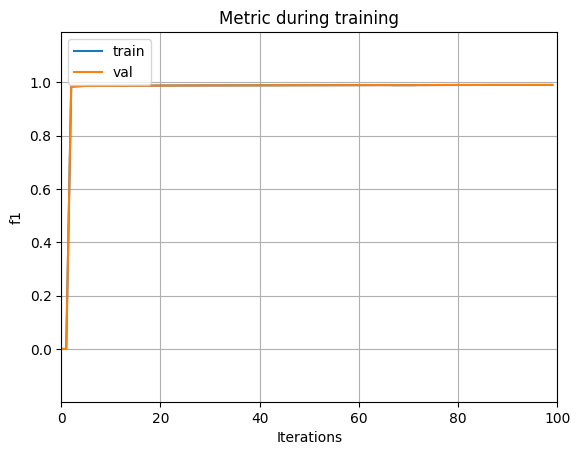

In [6]:
param = {
    'metric': [],
    'objective': 'binary'
}

train_lgbm = lgb.Dataset(train_features_cleaned.drop(["is_same"], axis=1), 
                         label=train_features_cleaned["is_same"])

val_lgbm = lgb.Dataset(val_features_cleaned.drop(["is_same"], axis=1), 
                         label=val_features_cleaned["is_same"])

evals_result = {}

clf = lgb.train(param, train_lgbm, valid_sets=[val_lgbm, train_lgbm], valid_names=['val', 'train'], feval=lgb_f1_score, evals_result=evals_result)

lgb.plot_metric(evals_result, metric='f1')

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

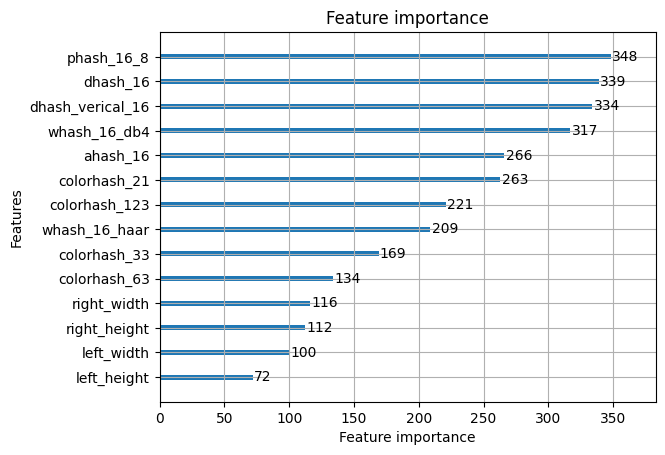

In [7]:
lgb.plot_importance(clf)

In [8]:
import json
with open('../models/basic_lgbm.json', 'w', encoding='utf-8') as f:
    json.dump(clf.dump_model(), f, ensure_ascii=False, indent=4)

In [9]:
test_features_cleaned

,ID,ahash_16,phash_16_8,phash,dhash_verical_16,dhash_16,colorhash_21,colorhash_33,colorhash_63,colorhash_123,whash_16_haar,whash_16_db4,left_height,right_height,left_width,right_width
0,2,126.0,116.0,116.0,129.0,103.0,77.0,121.0,235.0,361.0,130.0,286.0,800.0,600.0,600.0,800.0
1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,99.0,112.0,112.0,97.0,137.0,66.0,99.0,175.0,265.0,110.0,158.0,699.0,600.0,525.0,800.0
3,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,800.0,800.0,600.0,600.0
4,6,105.0,100.0,100.0,76.0,100.0,67.0,96.0,191.0,288.0,106.0,204.0,700.0,600.0,933.0,800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22655,22657,104.0,110.0,110.0,115.0,123.0,117.0,190.0,359.0,546.0,104.0,176.0,800.0,800.0,600.0,600.0
22656,22658,117.0,128.0,128.0,115.0,124.0,120.0,236.0,490.0,766.0,118.0,258.0,600.0,800.0,800.0,600.0
22657,22659,179.0,110.0,110.0,128.0,129.0,64.0,100.0,188.0,285.0,168.0,340.0,700.0,600.0,933.0,800.0
22658,22660,95.0,118.0,118.0,116.0,114.0,88.0,109.0,173.0,237.0,106.0,176.0,700.0,698.0,525.0,393.0


In [13]:
is_same = pd.Series(clf.predict(test_features_cleaned.drop(["ID"], axis=1)))
submission = pd.DataFrame({
    "ID": test_features_cleaned["ID"],
    "is_same": is_same
})

In [15]:
submission["is_same"] = (submission["is_same"] > 0.5).astype(int)
submission

,ID,is_same
0,2,0
1,3,0
2,4,0
3,5,1
4,6,0
...,...,...
22655,22657,0
22656,22658,0
22657,22659,0
22658,22660,0


In [16]:
submission.to_csv("boosting_baseline.csv", index=False)